In [1]:
#****************************************************************************************************************#
# Implementación de circuito Cuántico de Generación de Numéros Aleatorios (QRNG) en la plataforma Qiskit de IBM.
#****************************************************************************************************************#

#****************************************************************************************************************#
# Para esta implementación se ha tenido en cuenta la descripción del circuito dada en el siguiente tutorial:
# https://quantumcomputinguk.org/tutorials/qrng-web-application 
#****************************************************************************************************************#

#****************************************************************************************************************#
# Computación Cuántica
# Prof. Gustavo Patino (adolfo.patino@udea.edu.co)
# Facultad de Ingeniería
# Universidad de Antioquia
# Medellin, Colombia
# Abril, 2025
#****************************************************************************************************************#

In [2]:
# Importing standard python libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Importing standard Qiskit libraries

from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

from qiskit.quantum_info import Statevector

# from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.result import Counts
# from qiskit_aer import AerSimulator

In [4]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager

from qiskit_ibm_runtime.fake_provider import FakeKyiv

In [5]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [6]:
# Loading your IBM Quantum account(s)

# token = "<your-token>"

# QiskitRuntimeService.save_account(
#   token=token,
#   channel="ibm_quantum" # `channel` distinguishes between different account types
# )
 
# After using the following code, go to your dashboard (https://quantum.ibm.com/)
# and expire your API key (click the refresh button in the API key field)
# service = QiskitRuntimeService(channel="ibm_quantum", token=token)

In [7]:
service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_lima')>]

In [8]:
# ibmq_backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# print("Ahora el computador cuántico de 127 qubits menos ocupado es el", ibmq_backend.name)

ibmq_backend = FakeKyiv()
print("El computador cuántico de 127 qubits escogido es el", ibmq_backend.name)

El computador cuántico de 127 qubits escogido es el fake_kyiv


In [9]:
min = -100
max = 100

In [10]:
num_q = 5

q = QuantumRegister(num_q, 'q')
c = ClassicalRegister(num_q, 'c')

circuit = QuantumCircuit(q, c)

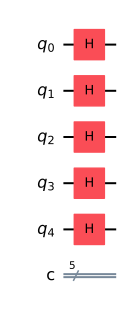

In [11]:
circuit.h(q)  # Applies hadamard gate to all qubits

circuit.draw('mpl')
plt.show()

In [12]:
display(array_to_latex(Statevector(circuit), prefix="\\ket{State_{out}} = "))

<IPython.core.display.Latex object>

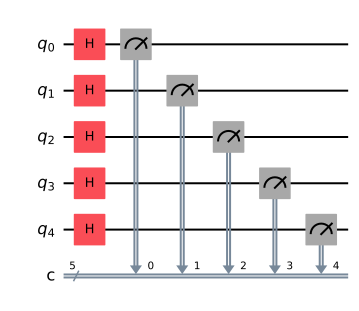

In [13]:
circuit.measure(q, c)  # Measures all qubits

circuit.draw('mpl')
plt.show()

In [14]:
pm = generate_preset_pass_manager(optimization_level=1, backend=ibmq_backend)
isa_circuit = pm.run(circuit)

# isa_circuit.draw('mpl')
# plt.show()

print(f">>> Circuit ops (ISA): {isa_circuit.count_ops()}")

>>> Circuit ops (ISA): OrderedDict({'rz': 10, 'sx': 5, 'measure': 5})


In [15]:
# Define the Sampler to run the circuit on a QPU
sampler2run = Sampler(mode=ibmq_backend)

# Define the number of shots for the execution. 
shotno=1

# Run the circuit on a real quantum computer. This may take a while.
job = sampler2run.run([isa_circuit], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> ID de la ejecución en el QPU escogido: {job.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Estado de la ejecución en el QPU escogido: {job.status()}")

print('Ejecutando el circuito (job) en el QPU de IBM ...\n')

>>> ID de la ejecución en el QPU escogido: d6ffbd2d-3b79-402a-b5ce-5ac7b689695d
>>> Estado de la ejecución en el QPU escogido: JobStatus.RUNNING
Ejecutando el circuito (job) en el QPU de IBM ...



In [17]:
# Nueva verificación del estado de la ejecución del circuito cuántico
print(f">>> Estado de la ejecución en el QPU escogido: {job.status()}")

>>> Estado de la ejecución en el QPU escogido: JobStatus.DONE


In [18]:
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]
# Get count measurement results

counts = pub_result.data.c.get_counts()
print('Conteo de resultados por cada medida: ', counts, '\n')

Conteo de resultados por cada medida:  {'10100': 1} 



In [19]:
#plot_histogram(conteos,figsize=(20,20), filename="histo.png")

In [20]:
random_obtained = Counts(counts).most_frequent()
print(random_obtained)

10100


In [21]:
resultado = int(random_obtained, 2) #https://www.programiz.com/python-programming/methods/built-in/int
print('El resultado binario como un entero decimal es: ', resultado, '\n')

El resultado binario como un entero decimal es:  20 



In [22]:
random_number = min + resultado % ((max+1) - min)
print('El numero aleatorio entre',min ,'y',max, 'es:', random_number, '\n')

El numero aleatorio entre -100 y 100 es: -80 



In [23]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from IPython.display import display, Math
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.0.0
IBM RunTime Version: 0.37.0
Qiskit_Aer Version: 0.17.0
Python Version: 3.13.2
2025 ©
